In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
df = pd.DataFrame(columns=iris.feature_names, data=iris.data)
df["target"] = iris.target
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [3]:
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

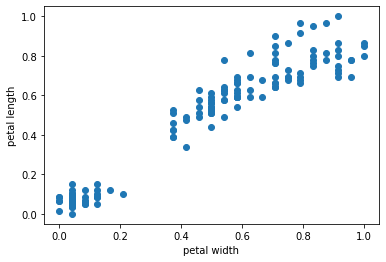

In [4]:
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.scatter(df['petal width (cm)'], df['petal length (cm)'])
plt.show()

In [5]:
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(df.drop(["target"], axis='columns'))
df['predicted'] = y_pred

In [6]:
df1 = df.loc[df['predicted'] == 0]
df2 = df.loc[df['predicted'] == 1]
df3 = df.loc[df['predicted'] == 2]

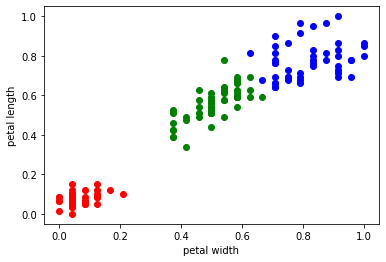

In [7]:
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.scatter(df1['petal width (cm)'], df1['petal length (cm)'], color='red')
plt.scatter(df2['petal width (cm)'], df2['petal length (cm)'], color='blue')
plt.scatter(df3['petal width (cm)'], df3['petal length (cm)'], color='green')
plt.show()

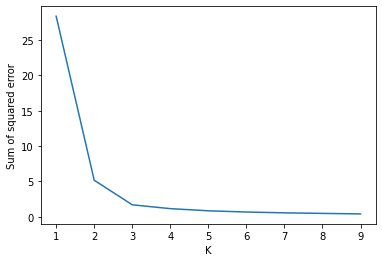

In [8]:
sse = []

for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df[['petal width (cm)','petal length (cm)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1, 10), sse)
# Elbow rule